# Confounding Demo

This Jupyter notebook contains a demonstration of some of the basic functions of the Natural Language to Bayesian Network Agent, focusing on a larger causal system.

## Install the Package

In [1]:
!pip install git+https://github.com/davidbkinney/NaLBaNA.git

  Cloning https://github.com/davidbkinney/NaLBaNA.git to /tmp/pip-req-build-8tr37ct4
  Running command git clone --filter=blob:none --quiet https://github.com/davidbkinney/NaLBaNA.git /tmp/pip-req-build-8tr37ct4
  Resolved https://github.com/davidbkinney/NaLBaNA.git to commit 0211344a71ed8fc5b5c09d206cd6ac1bd566a8e0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for NaLBaNA: filename=nalbana-0.1.0-py3-none-any.whl size=16962 sha256=81aacec379723ee74197e5af08685df023822334674ad253ad411224442c0130
  Stored in directory: /tmp/pip-ephem-wheel-cache-h2jn_3tn/wheels/62/e1/ea/cb2d09e65fb5e1b0631548ddf6b610efa3102537ac04eb6ba5
Successfully built NaLBaNA


In [2]:
from NaLBaNA import bayes_net

## Connect to the OpenAI API

In [3]:
bayes_net.input_key("Your API Key")

## Three-Variable Confounder Structure

Here we examine a three-variable causal structure where one variable confounds a causal relationship between the other two.

First we input our prompt.

In [4]:
prompt = """
A typical car engine works by converting the chemical energy in fuel into
mechanical motion through a controlled series of explosions inside metal
cylinders. Air and fuel are mixed and drawn into a cylinder, where a piston
compresses the mixture; a spark plug then ignites it, causing a small
explosion that forces the piston downward. This up-and-down motion is
transferred to a rotating shaft called the crankshaft, which ultimately turns
the wheels. After the explosion, exhaust gases are pushed out of the cylinder,
and the cycle repeats many times per second across multiple cylinders.
By carefully timing fuel injection, ignition, and exhaust, the engine produces
smooth, continuous power that propels the car forward.
"""

Next, we generate a Bayesian network from that prompt.

In [5]:
bn = bayes_net.generate_bayes_net(prompt)

Extracting variables.
Error: Less than two variables extracted. Retrying variable extraction.
Error: Less than two variables extracted. Retrying variable extraction.
Variables extracted.
Generating variable values.
Variable values generated.
Defining causal graph.
Causal graph defined.
Generating conditional probability tables.
1 of 12 conditional probability tables generated (one per variable).
2 of 12 conditional probability tables generated (one per variable).
3 of 12 conditional probability tables generated (one per variable).
4 of 12 conditional probability tables generated (one per variable).
5 of 12 conditional probability tables generated (one per variable).
6 of 12 conditional probability tables generated (one per variable).
7 of 12 conditional probability tables generated (one per variable).
8 of 12 conditional probability tables generated (one per variable).
9 of 12 conditional probability tables generated (one per variable).
10 of 12 conditional probability tables generated

Now we visualize the causal graph.

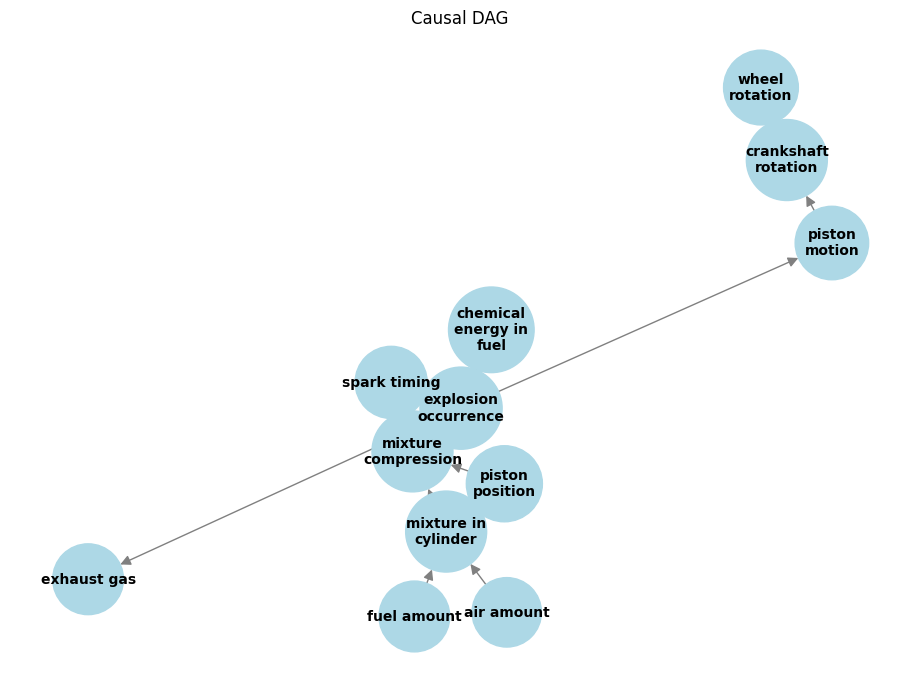

In [6]:
bayes_net.visualize(bn)

Let's examine the variables and their values. **IMPT: The names of your variables and values may differ from those shown here, depending on what the LLM actually outputs. When making the function calls below, you must change variable names and values to reflect your actual output from the previous LLM call.**

In [7]:
bn.values

[{'variable': 'chemical energy in fuel', 'values': ['present', 'depleted']},
 {'variable': 'air amount', 'values': ['low', 'optimal', 'high']},
 {'variable': 'fuel amount', 'values': ['low', 'optimal', 'high']},
 {'variable': 'mixture in cylinder',
  'values': ['lean', 'stoichiometric', 'rich']},
 {'variable': 'piston position',
  'values': ['top dead center', 'bottom dead center', 'midstroke']},
 {'variable': 'mixture compression',
  'values': ['not compressed', 'partially compressed', 'fully compressed']},
 {'variable': 'spark timing', 'values': ['early', 'optimal', 'late']},
 {'variable': 'explosion occurrence', 'values': ['no explosion', 'explosion']},
 {'variable': 'piston motion', 'values': ['upward', 'downward', 'stationary']},
 {'variable': 'crankshaft rotation', 'values': ['not rotating', 'rotating']},
 {'variable': 'wheel rotation', 'values': ['not rotating', 'rotating']},
 {'variable': 'exhaust gas', 'values': ['present', 'not present']}]

As a quick demo, let's compare the marginal probability over wheel rotation with and without an intervention on explosion occurrence.

In [9]:
bayes_net.get_marginal_distribution(bn,'wheel rotation')

,wheel rotation,marginal_probability
0,not rotating,0.405906
1,rotating,0.594094


In [10]:
bayes_net.get_marginal_distribution(bn,'wheel rotation',
                            intervention=[{"variable":"explosion occurrence",
                                           "value":"explosion"}])

,wheel rotation,marginal_probability
0,not rotating,0.34786
1,rotating,0.65214
